# Quickstart

Welcome to `squishyplanet`'s documentation! `squishyplanet` can create lightcurves of exoplanets that have been squashed into triaxial ellipsoids through rotational/tidal forces. Visualizing all of the angles/axes can be tricky, so although it doesn't take many lines of code to generate a model of an oblate planet, we recommend that all users start with the [Geometry Visualizations](https://squishyplanet.readthedocs.io/en/latest/geometry.html) page first to get oriented. Other tutorials include much more detailed walkthroughs of the code's capabilities and how one might use it during data analysis, so here we'll keep details light and just create a simple system.

In [1]:
import jax

jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import matplotlib.pyplot as plt

from squishyplanet import OblateSystem  # for most users, this is the only import needed

Here's how you create an OblateSystem object, which you can then use for lightcurve/likelihood calculations:

In [2]:
state = {
    "t_peri" : 0.0,
    "times" : jnp.linspace(0.0, 5, 400), # units of days
    "a" : 2.0, # units of R_star
    "period" : 10, # units of days
    "r" : 0.1, # units of Rp/Rs
    "ld_u_coeffs":jnp.array([0.3, 0.1]), # u coefficients for a polynomial (here,
    # quadratic u1 and u2) limb darkening law
    "tidally_locked" : False,
}
planet = OblateSystem(**state)

There are many other parameters you can set, but these are required for all systems.

Here's how you create a lightcurve:

In [3]:
spherical_lc = planet.lightcurve()

You can tweak any of the parameters in the OblateSystem object and re-run the lightcurve calculation to see how the lightcurve changes. For example, let's make see how squishing the planet along the z-axis changes the lightcurve:

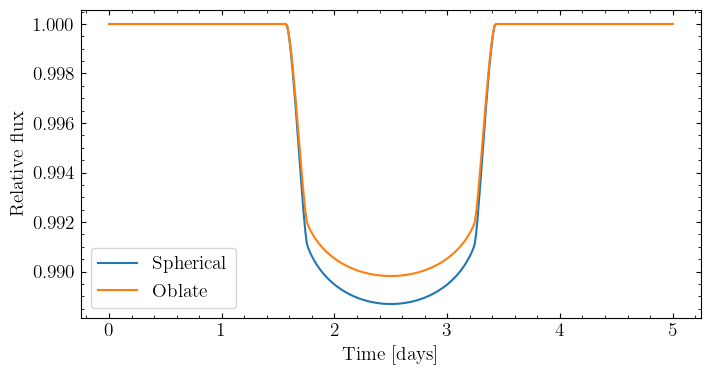

In [4]:
oblate_lc = planet.lightcurve({"f1" : 0.1})

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(planet.state["times"], spherical_lc, label="Spherical")
ax.plot(planet.state["times"], oblate_lc, label="Oblate")
ax.set(xlabel="Time [days]", ylabel="Relative flux")
ax.legend();

The depth is very different since squishing the planet changed its projected area: we made the planet smaller on one axis and didn't compensate on any others. That leaves us with a lightcurve that looks very similar to a sphereical planet with a smaller radius. To demonstrate that oblateness creates unique signatures that can't be mimicked by a spherical planet, let's scale the planet up before squishing it:

In [5]:
oblate_lc = planet.lightcurve({"r" : 0.1/jnp.sqrt(1-0.1), "f1" : 0.1})

Now the deviation is on the order of ~10s of parts per million:

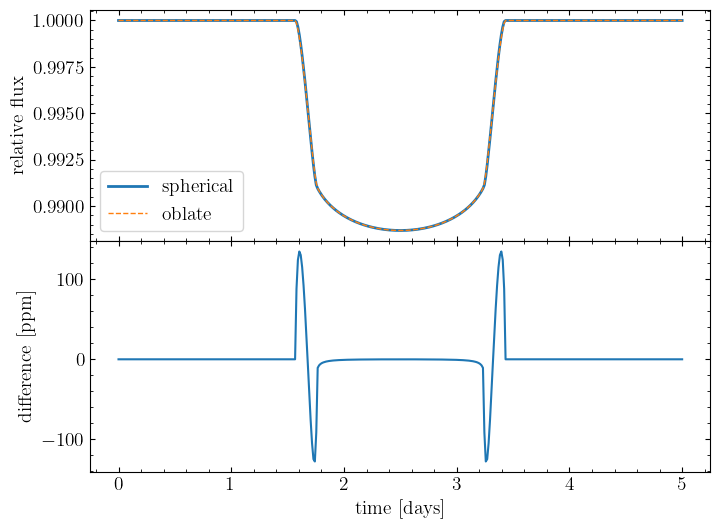

In [6]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))
ax[0].plot(planet.state["times"], spherical_lc, lw=2, label="spherical")
ax[0].plot(planet.state["times"], oblate_lc, lw=1, linestyle="--", label="oblate")
ax[0].set(ylabel="relative flux")
ax[0].legend()
ax[1].plot(planet.state["times"], (spherical_lc - oblate_lc)*1e6)
ax[1].set(xlabel="time [days]", ylabel="difference [ppm]")

fig.subplots_adjust(hspace=0);